In [359]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import pandas as pd
import random

Load Dataset and check datatypes

In [360]:
df = pd.read_csv("ActivityLA2023-11-28T1622.csv")
##  Shorten col names
df.rename(columns = {'Activity Totals Data Participant ID':'ID'}, inplace = True)
df.rename(columns = {'Activity Totals Data Entry Date':'Date'}, inplace = True)
df.rename(columns = {'Activity Totals Data Stddev La':'LaSD'}, inplace = True)
df.rename(columns = {'Activity Totals Data Total La':'La'}, inplace = True)
df.rename(columns = {'Activity Totals Data Average Actual LA':'LaAvg1'}, inplace = True)
df.rename(columns = {'Activity Totals Data Avg Actual LA':'LaAvg2'}, inplace = True)
df.rename(columns = {'Activity Totals Data Avg Normalized La':'LaNorm1'}, inplace = True)
df.rename(columns = {'Activity Totals Data La Avg Normalized':'LaNorm2'}, inplace = True)
df.rename(columns = {'Activity Totals Data Count':'Count1'}, inplace = True)
print(df.tail(4))
df = df.drop([7848])
df= df.sort_values(by=['ID'], ascending=True)
df = df[['ID', 'Date', 'La', 'LaSD', 'LaAvg1', 'LaAvg2','LaNorm1','LaNorm2', 'Count1']]
df['Date'] =pd.to_datetime(df['Date'])  ## convert date object to datetime
print(df.dtypes) ## Show data types

        ID        Date       LaSD        La     LaAvg2     LaNorm1     LaAvg1  \
7845  47.0  2015-09-08  47.090939  14616.88  91.930063  229.626956  91.930063   
7846  47.0  2015-10-09  29.490892  12829.45  79.686025  199.043259  79.686025   
7847  47.0  2015-07-28  40.180868  15602.13  96.309444  240.565968  96.309444   
7848   NaN         NaN        NaN       NaN        NaN         NaN   0.000000   

      Activity Totals Data Average Actual RA  Count1     LaNorm2  \
7845                               71.413742       1  229.626956   
7846                               51.351060       1  199.043259   
7847                               65.540710       1  240.565968   
7848                                0.000000       0    0.000000   

      Activity Totals Data Total La.1  
7845                         14616.88  
7846                         12829.45  
7847                         15602.13  
7848                             0.00  
ID                float64
Date       datetime64[ns]
L

Get stats

In [361]:
df.describe()

,ID,La,LaSD,LaAvg1,LaAvg2,LaNorm1,LaNorm2,Count1
count,7848.000000,7740.000000,7740.000000,7848.000000,7740.000000,7740.000000,7848.000000,7848.0
mean,650.804154,31651.358212,83.898180,211.610350,214.563053,535.945034,528.569644,1.0
std,497.981892,22436.600944,56.707058,146.817466,145.679639,363.885012,366.727128,0.0
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,259.000000,14432.205000,41.942504,97.391022,100.800452,251.783805,243.267580,1.0
50%,489.000000,27205.845000,72.897542,184.786294,187.665480,468.759092,461.567335,1.0
75%,1032.000000,45663.750000,113.578457,305.936452,307.588953,768.309222,764.181531,1.0
max,2056.000000,140471.310000,827.025784,1004.772083,1004.772083,2509.763920,2509.763920,1.0


Histograms

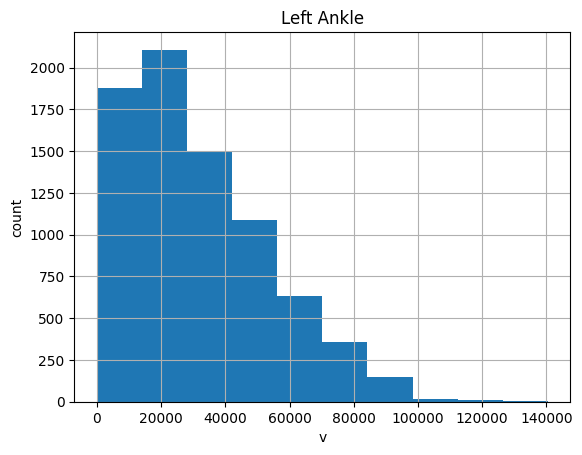

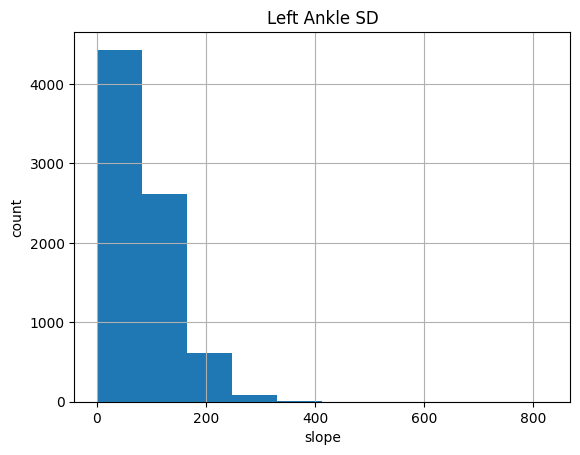

<AxesSubplot: title={'center': 'La Outliers'}, xlabel='ID', ylabel='La'>

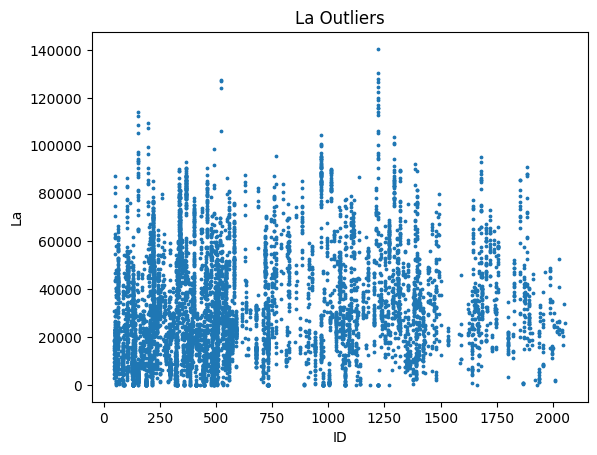

In [362]:

df['La'].hist()  ##Lw values
plt.xlabel("v")
plt.ylabel("count")
plt.title('Left Ankle')
plt.show()
df['LaSD'].hist()  ##Rw values
plt.xlabel("slope")
plt.ylabel("count")
plt.title('Left Ankle SD')
plt.show()

df.plot(kind='scatter', x='ID', y='La', s=3, title="La Outliers")

Group by Participant

Count, mean, min, and max values of Left Ankle by ID
          La                                  
       count          mean       min       max
ID                                            
47.0      13  13119.070000   3097.68  30906.90
48.0      33  30972.361515   3404.77  87493.86
49.0      97  16201.871443   3507.38  31060.93
52.0      28  23736.830357   3327.22  58249.05
53.0       5  33535.398000  21023.96  39949.97
...      ...           ...       ...       ...
2029.0     4  23463.872500  21161.46  26532.71
2043.0     2  22699.355000  22301.27  23097.44
2044.0     2  18622.755000  16866.41  20379.10
2051.0     1  33687.190000  33687.19  33687.19
2056.0     1  25802.180000  25802.18  25802.18

[480 rows x 4 columns]


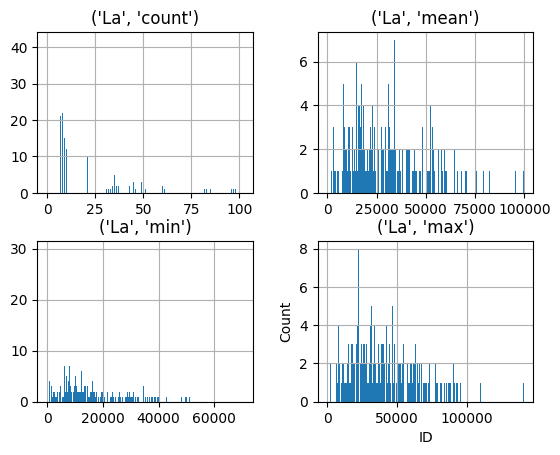

In [363]:
result = df.groupby('ID', sort=True,).agg({'La': ['count', 'mean', 'min', 'max']})
# result= result.sort_values(by=['La': ['count']], ascending=True)  
print("Count, mean, min, and max values of Left Ankle by ID") 
print(result)
result.hist(bins = 500)
plt.xlabel("ID")
plt.ylabel("Count")
plt.show()



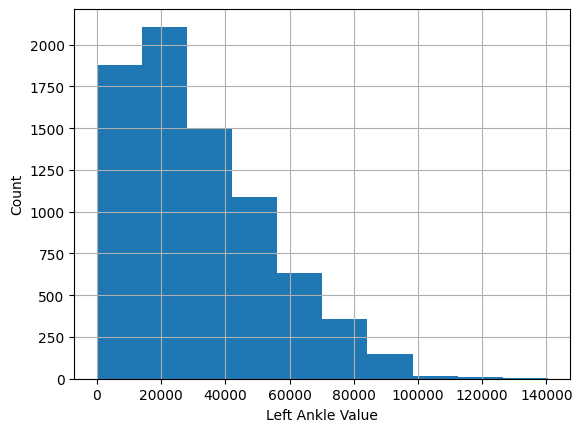

In [364]:
df['La'].hist()
plt.xlabel("Left Ankle Value")
plt.ylabel("Count")
plt.show()

C:\Users\cliff\AppData\Local\Temp\ipykernel_34936\4065325051.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(['ID'], sort = False).sum())


                La         LaSD        LaAvg1        LaAvg2       LaNorm1  \
ID                                                                          
48.0    1022087.93  2677.485034   7486.776080   7486.776078  18700.798707   
49.0    1571581.53  4419.384992  10349.678967  10349.678966  25851.883508   
65.0    3878133.16  9684.075965  26129.501104  26129.501103  65267.417552   
90.0     394812.46  1062.996296   2691.751188   2691.751190   6723.574559   
101.0   1999150.45  4862.074255  13762.967206  13762.967208  34377.745063   
...            ...          ...           ...           ...           ...   
1320.0  2132161.33  5946.389680  13065.977795  13065.977794  32636.774237   
1352.0   449710.70  1496.376564   2981.343746   2981.343745   7446.931586   
1389.0   499111.64  2437.034402   3200.313422   3200.313422   7993.883678   
1395.0  1814725.39  5284.755871  10399.453582  10399.453583  25976.212736   
1422.0   738474.86  2158.925090   4511.831046   4511.831049  11269.850115   

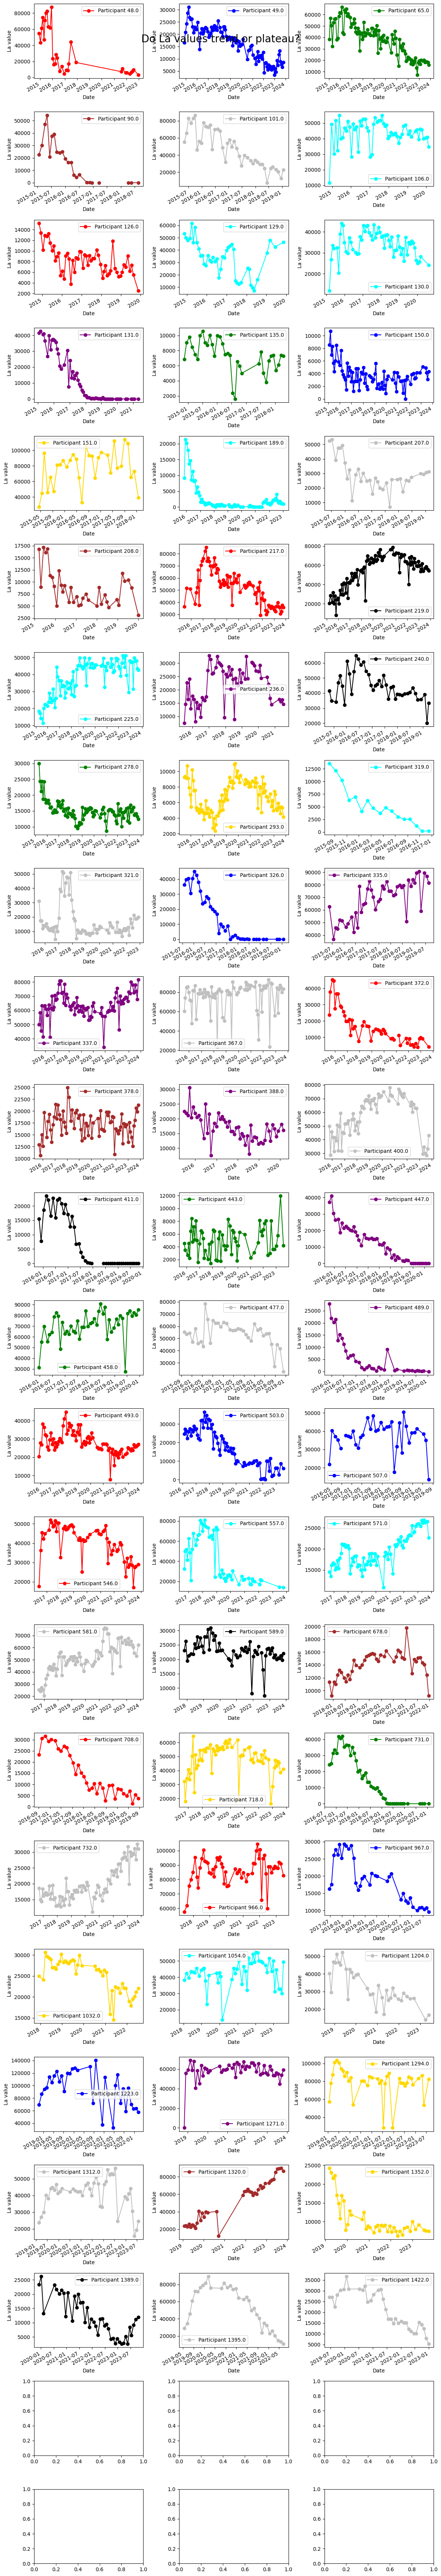

In [365]:
# df = df.sort_values(by=['ID','Date'], ascending=True) ##  Sort by ID then Date
df = df.groupby('ID').filter(lambda x : len(x)>30)  # Reduce data to IDs with six or more activity entries
# print(df.head())
print(df.groupby(['ID'], sort = False).sum())
import random
fig, axs = plt.subplots(figsize=(12, 70), nrows=24, ncols=3)
c = ['purple', 'red', 'green', 'blue', 'black', 'brown', 'gold', 'silver', 'aqua']
for (n, g), ax in zip(df.groupby("ID"), axs.flatten()):
    g.plot(
        x="Date", y="La", marker='o',
        xlabel="Date", ylabel="La value",
        label=f"Participant {n}",
        color=c[random.randint(0, 8)],
        ax=ax,
    )
fig.suptitle('Do La values trend or plateau?', fontsize = 20, color = 'black')
plt.tight_layout()
plt.show()

In [366]:
df= df.sort_values(by='Date', ascending=True)
df = df.loc[df['ID'] == 1422]
df.describe()

,ID,La,LaSD,LaAvg1,LaAvg2,LaNorm1,LaNorm2,Count1
count,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,1422.0,21099.281714,61.683574,128.909458,128.909459,321.995718,321.995718,1.0
std,0.0,8486.809257,19.382723,52.563711,52.563711,131.295950,131.295950,0.0
min,1422.0,5261.430000,18.322193,33.944710,33.944710,84.788589,84.788589,1.0
25%,1422.0,14925.105000,46.870836,87.402375,87.402375,218.317497,218.317497,1.0
50%,1422.0,21288.110000,61.936773,118.267278,118.267278,295.413210,295.413210,1.0
75%,1422.0,29233.355000,76.471778,178.890788,178.890788,446.841282,446.841282,1.0
max,1422.0,36671.160000,92.223931,232.095949,232.095949,579.739475,579.739475,1.0
